# 패턴 매칭

### 패턴 매칭에 사용되는 알고리즘들
- 고지식한 패턴 검색 알고리즘 ★
- 카프 - 라빈 알고리즘
- KMP 알고리즘
- 보이어 - 무어 알고리즘

## 고지식한 알고리즘(Brute Force)
- 본문 문자열을 처음부터 끝까지 차례대로 순회하면서 패턴 내의 문자들을 일일이 비교하는 방식으로 동작함
- 3가지 방법이 있음


- 고지식한 패턴 검색 알고리즘의 시간 복잡도
  - 최악의 경우 시간 복잡도는 텍스트의 모든 위치에서 패턴을 비교해야 하므로 O(MN)이 됨
  

In [ ]:
i = j = 0
while i < N and j < M :
    if t[i] == p[j] : #일치
        i += 1
        j += 1
    else : #불일치
        i = i-j +1
        j = 0

In [2]:
t = 'TTTATTTABC'
p = 'TTA'

N = len(t)
M = len(p)
cnt = 0
for i in range(N-M+1) : #비교시작위치
    for j in range(M) :
        if t[i+j] != p[j] :
            break   #for j(j를 위한 break), 다음 글자부터 비교 시작 #break 걸리면 for와 else 모두 빠져나감 #일치하면 break에 안걸리고 for문을 모두 돌게됨
    else :          #for j 가 중단없이 반복되면
        cnt += 1    #패턴 개수 1 증가

print(cnt)



2


In [5]:
# 연습문제
# 어느 위치에서 일치하는지 출력하시오!

def f(t,p) : #패턴 p와 일치하는 구간의 시작 인덱스 리턴, 일치하는 경우가 없으면 -1 리턴
    N = len(t)
    M = len(p)
    for i in range(N-M+1) : #비교시작위치
        for j in range(M) :
            if t[i+j] != p[j] :
                break   #for j(j를 위한 break), 다음 글자부터 비교 시작 #break 걸리면 for와 else 모두 빠져나감 #일치하면 break에 안걸리고 for문을 모두 돌게됨
    else :          #for j 가 중단없이 반복되면
        return -1    
    
t = 'TTTATTTABC'
# t = 'ABCDEFGHIASDK'
p = 'TTA'

print(f(t,p))

-1


## KMP 알고리즘
- 이런게 있지정보만 알면 됨! 보고 이해하거나 설명할 수 있는 정도면 됨
- 고지식한은 하나 이상 코드 구현할 줄 알아야 함
- 불일치가 발생한 텍스트 스트링의 앞 부분에 어떤 문자가 있는지를 미리 알고 있으므로, 불일치가 발생한 앞 부분에 대하여 다시 비교하지 않고 매칭을 수행
- 패턴을 전처리하여 배열 next[M]을 구해서 잘못된 시작을 최소화함
  - next[M] : 불일치가 발생했을 경우 이동할 다음 위치
- 시간 복잡도 : O(M+N)
- 아이디어 설명
  - 텍스트에서 abcdabc까지는 매치되고, e 에서 실패한 상황 패턴의 맨 앞의 abc와 실패 직전의 abc는 동일함을 이용할 수 있다.
  - 실패한 텍스트 문자와 P[4]를 비교한다.

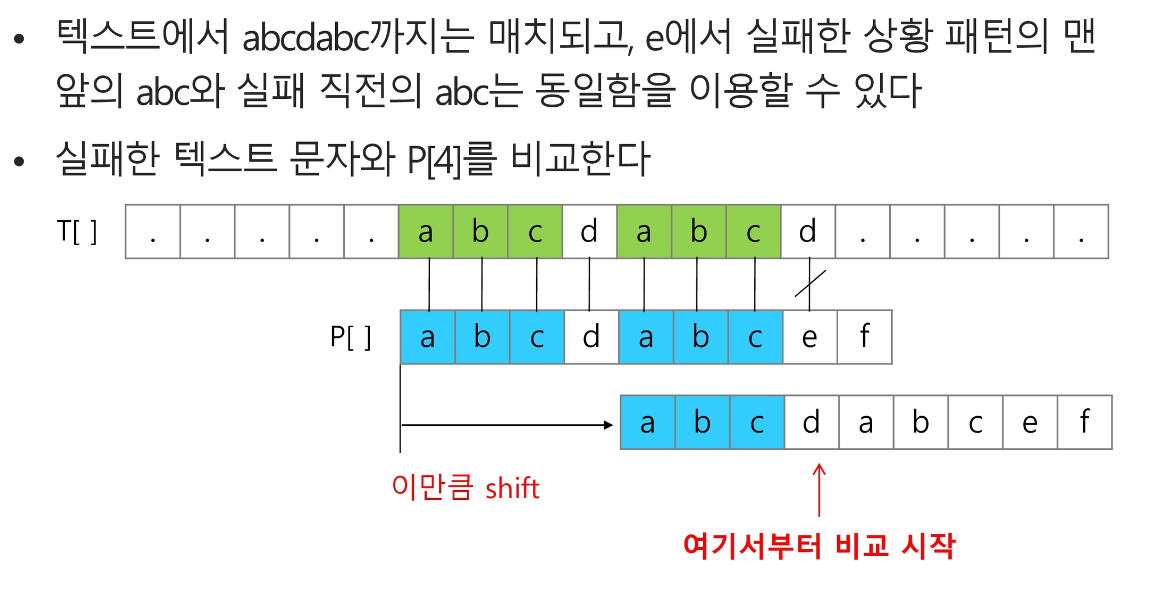
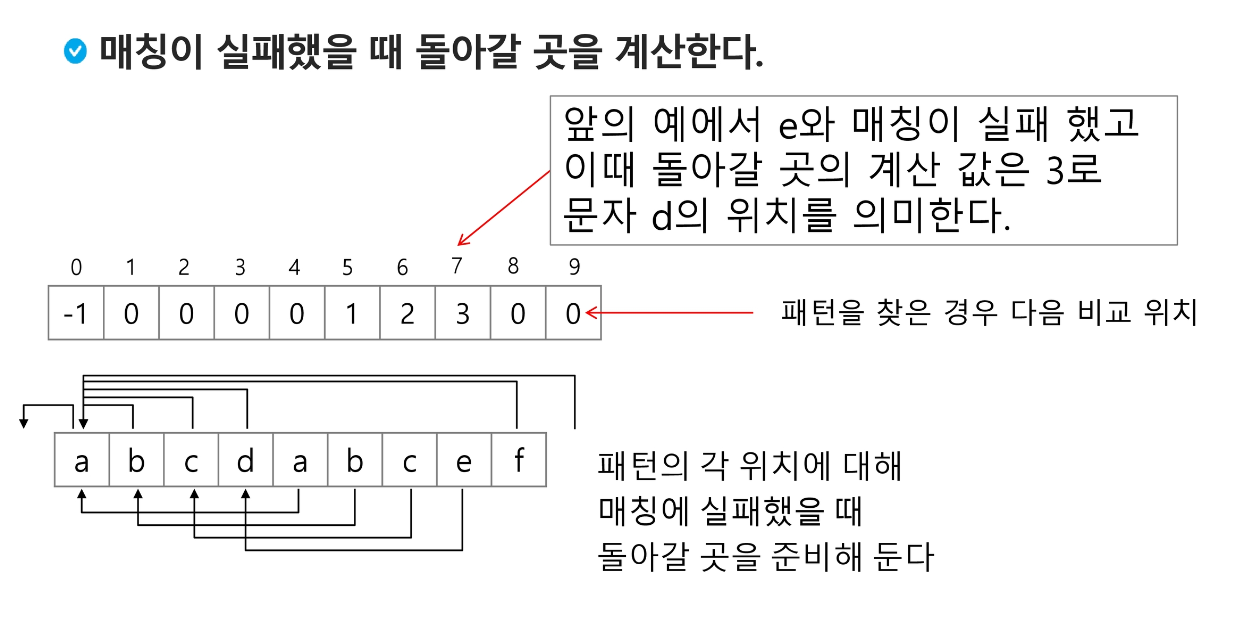

In [7]:
def kmp(t,p) :
    N = len(t)
    M = len(p)
    lps = [0]* (M+1)

    #preprocessing
    j = 0       #일치한 개수 == 비교할 패턴 위치
    lps[0] = -1
    for i in range(1,M) :
        lps[i] = j      #p[i] 이전에 일치한 개수
        if p[i] == p[j] :
            j += 1
        else :
            j = 0
    lps[M] = j
    print(lps) #비교 테이블에 들어가는 값

    #search

    i = 0
    j = 0
    while i < N and j <= M :
        if j == -1 or t[i] == p[j] :    #첫 글자가 불일치했거나 또는 일치하면
            i += 1
            j += 1
        else :          #불일치할경우 미리 찍어둔 인덱스로 이동
            j = lps[j]
        if j == M :     #패턴을 찾은 경우
            print(i-M, end = ' ')       #패턴의 인덱스 출력
            j = lps[j]
    print()
    return
       

#일치하는 위치를 반환

t = 'zzzabcdabcdabcefabcd'
p = 'abcdabcef'
kmp(t,p)

t = 'AABAACAADAABAABA'
p = 'AABA'
kmp(t,p)

t = 'AAAAABAAABA'
p = 'AAAA'
kmp(t,p)

t = 'AAAAABAAABA'
p = 'AA'
kmp(t,p)

[-1, 0, 0, 0, 0, 1, 2, 3, 0, 0]
7 
[-1, 0, 1, 0, 1]
0 9 12 
[-1, 0, 1, 2, 3]
0 1 
[-1, 0, 1]
0 1 2 3 6 7 


# 보이어-무어 알고리즘
- 오른쪽에서 왼쪽으로 비교
- 대부분의 상용 소프트웨어에서 채택하고 있는 알고리즘
- 보이어-무어 알고리즘은 패턴에 오른쪽 끝에 있는 문자가 불일치하고 이 문자가 패턴 내에 존재하지 않는 경우, 이동거리는 무려 패턴의 길이만큼이 된다.
- 구현을 시키진 않음. 이런 방법이 있다정도만.. B형 볼 사람만 대비하기
- 자세히 다 알 필요는 없음

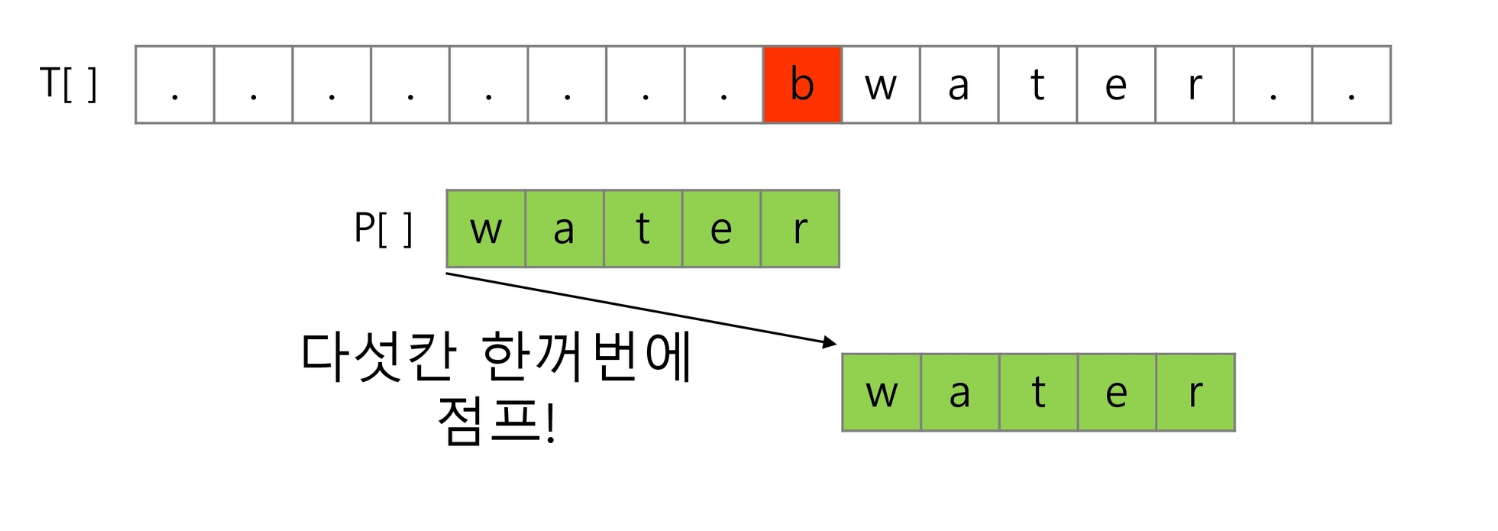
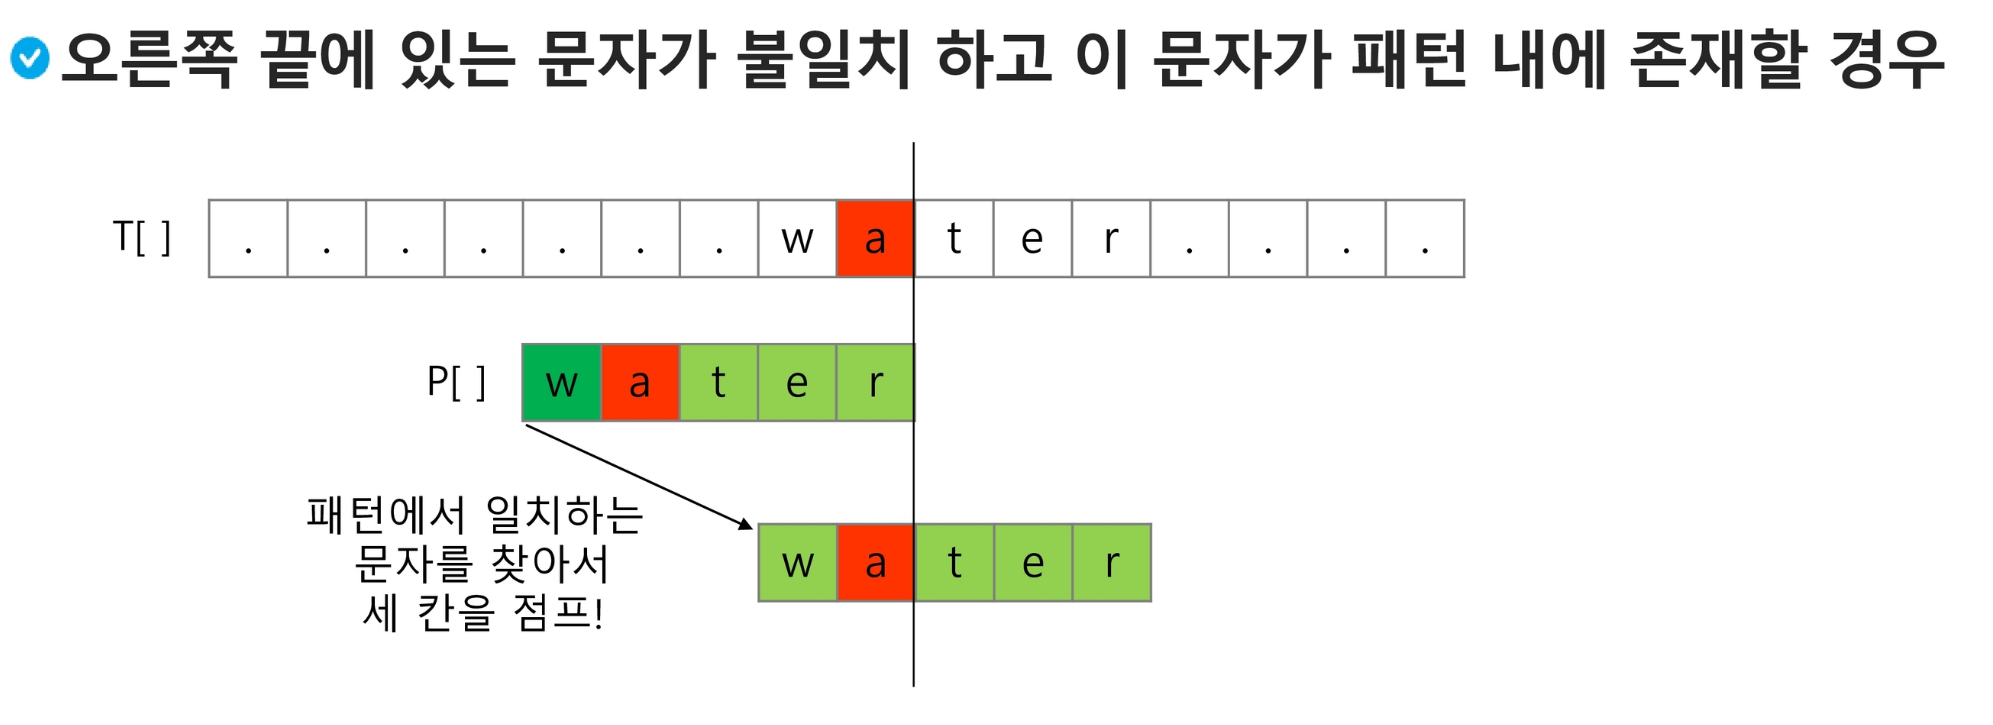

In [1]:
p = 'XYPV'          #Pattern
t = 'EOGGXYPVSY'    #Text

# 패턴 매칭 : 0번 인덱스부터 패턴의 길이만큼 text를 조사

n = len(t)
m = len(p)

# text의 길이 N, pattern의 길이 M 일 때, 조사 범위는 N-M

for s in range(0,n-m+1):       #시작 위치 s  #t[s] ~ 하나씩 비교 -> 비교 횟수 : 패턴의 길이만큼
    found = True            #나중에 값을 찾았는지, 못찾았는지 확인하기 위한 플래그변수
    for i in range(m) :
        # p[i]  t[s+i] : 아래 그림 참고
        if p[i] != t[s+i] :
            found = False   #플래그변수 # 못찾았다
            break           #같으면 for문이 끝까지 다 돌아서 끝남(일치) #다르면 break가 걸려서 끝남(불일치)
    if found :              # 찾았을 때
        print(t[s:s+m])     #시작점+패턴의 길이만큼 슬라이싱
                            #끝내는 방법: break or 함수써서 return
                            #여러번 반복하려면 while문을 사용하는게 좋음
    

XYPV


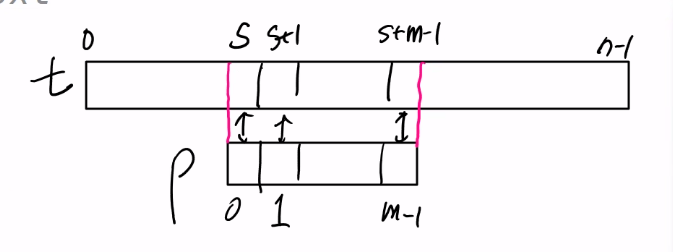

In [8]:
#여러개를 찾을 때

p = 'AAA'                  #Pattern
t = 'EOGAAAAAAGXYPVSY'       #Text

# 패턴 매칭 : 0번 인덱스부터 패턴의 길이만큼 text를 조사

n = len(t)
m = len(p)

# text의 길이 N, pattern의 길이 M 일 때, 조사 범위는 N-M

for s in range(0,n-m+1):       #시작 위치 #t[10] ~ 하나씩 비교 -> 비교 횟수 : 패턴의 길이만큼
    found = True
    for i in range(m) :
        # p[i]  t[s+i] : 아래 그림 참고
        if p[i] != t[s+i] :
            found = False   #플래그변수
            break           #같으면 for문이 끝까지 다 돌아서 끝남(일치) #다르면 break가 걸려서 끝남(불일치)
    if found :
        print(t[s:s+m])     #시작점+패턴의 길이만큼 슬라이싱
                            #끝내는 방법: break or 함수써서 return
                            #여러번 반복하려면 while문을 사용하는게 좋음
    

AAA
AAA
AAA
AAA


In [12]:
# 중첩되지 않게 여러개를 찾을 때 : While 문 필요

p = 'AAA'                  #Pattern
t = 'EOGAAAAAAGXYPVSY'       #Text

# 패턴 매칭 : 0번 인덱스부터 패턴의 길이만큼 text를 조사

n = len(t)
m = len(p)

# text의 길이 N, pattern의 길이 M 일 때, 조사 범위는 N-M

s = 0
while s <= n-m :
    found = True
    for i in range(m) :     #text 길이만큼 반복하며 비교
        if p[i] != t[s+i] :
            found = False   #플래그변수
            break 
    if found :          # 일치하는 경우
        print(t[s:])    # pattern 길이만큼(m) 건너뛰고 그 다음것부터 확인해봐야하니까 s+m
        s += m -1       # 아래에서 +1을 하니까 -1 해줌 

    # if found :
    #     print(t[s:])
    #     s += m
    #     continue

    s += 1  #못찾으면 break되고 s+=1 실행되서 다음거 실행함 #중요한 조건!

AAAAAAGXYPVSY
AAAGXYPVSY


In [16]:
p = 'AAA'                  #Pattern
t = 'EOGAAAAAAGXYPVSY'       #Text
n = len(t)
m = len(p)

# i,j = 0,0
# while i< n and j < m :
#     if t[i] == t[j] :
#         i,j = i+1, j+1
#     else :
#         i = i-j+1
#         j = 0

i,j = 0,0
while i< n and j < m :
    if t[i] != t[j] :
        i = i-j
        j = -1          # 아래에서 +1이 항상 실행되니까 -1 해서 초기화해줌
    i,j = i+1, j+1      #항상 실행

    if j == m :
        print(t[i-m :])
        j = 0


EOGAAAAAAGXYPVSY


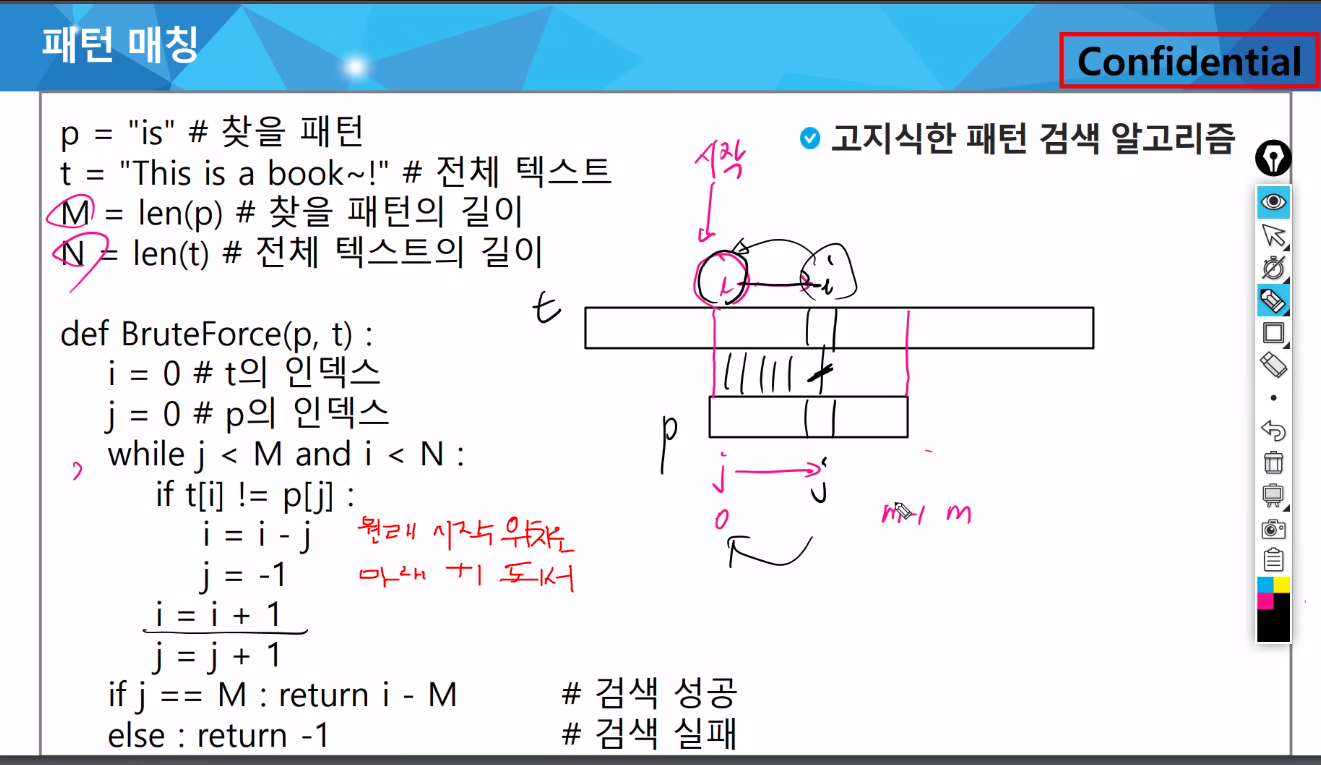

In [ ]:
# SWEA 1215 회문

N = 8
arr = 'ACAACABC'
M = 4       #찾을 회문의 길이

s = 1               # 시작 인덱스
e = s + m -1        # 끝 인덱스

for i in range(M//2) :  #절반만 비교하면 됨
    #arr[s+i] <-> arr [e-i]
    if arr[s+i] != arr[e-i] :
        print('회문이 아님')
        break

else :
    print('회문입니다.')
    



In [ ]:
# 시작을 바꿔주면 모든 문장에서 회문을 탐색할 수 있음

N = 8
arr = 'ACAACABC'
M = 4       #찾을 회문의 길이

for s in range(0, N-M+1) :               # 시작 인덱스 돌리면서 처음부터 끝까지 순회
    e = s + M -1        # 끝 인덱스

    for i in range(M//2) :  #절반만 비교하면 됨
        #arr[s+i] <-> arr [e-i]
        if arr[s+i] != arr[e-i] :
            print('회문이 아님')
            break

    else :
        print('회문입니다.')
        

In [ ]:
# 모든 행에 대해 확인해야 할 때

# N = 8
# arr = 'ACAACABC'
# M = 4       #찾을 회문의 길이
for tc in range(1,11) :
    N = 8
    M = int(input())
    arr = [input() for _ in range(N)]


cnt = 0
# 모든 행에 대해 검사
for row in range(N) :
    # arr[row] 행에 대해서 처리
    for s in range(0, N-M+1) :               # 시작 인덱스 돌리면서 처음부터 끝까지 순회
        e = s + M -1        # 끝 인덱스

        for i in range(M//2) :  #절반만 비교하면 됨
            #arr[s+i] <-> arr [e-i]
            if arr[row][s+i] != arr[row][e-i] :
                print('회문이 아님')
                break

        else :
            cnt += 1
            print('회문입니다.')

# 모든 열에 대해 검사
for col in range(N) :
    # arr[][col] 열에 대해서 처리
    for s in range(0, N-M+1) :               # 시작 인덱스 돌리면서 처음부터 끝까지 순회
        e = s + M -1        # 끝 인덱스

        for i in range(M//2) :  #절반만 비교하면 됨
            #arr[s+i] <-> arr [e-i]
            if arr[s+i][col] != arr[e-i][col] :
                print('회문이 아님')
                break

        else :
            cnt += 1
            print('회문입니다.')
            
            
print(cnt)

In [ ]:
# 회문 12394


def find_palindrome(arr,N,M) :
    # 모든 행에 대해 검사
    for row in range(N) :
        # arr[row] 행에 대해서 처리
        for s in range(0, N-M+1) :               # 시작 인덱스 돌리면서 처음부터 끝까지 순회
            e = s + M -1        # 끝 인덱스

            for i in range(M//2) :  #절반만 비교하면 됨
                #arr[s+i] <-> arr [e-i]
                if arr[row][s+i] != arr[row][e-i] :
                    print('회문이 아님')
                    break

            else :
                return arr[row][s:e+1]

    # 모든 열에 대해 검사
    for col in range(N) :
        # arr[][col] 열에 대해서 처리
        for s in range(0, N-M+1) :               # 시작 인덱스 돌리면서 처음부터 끝까지 순회
            e = s + M -1        # 끝 인덱스

            for i in range(M//2) :  #절반만 비교하면 됨
                #arr[s+i] <-> arr [e-i]
                if arr[s+i][col] != arr[e-i][col] :
                    print('회문이 아님')
                    break

            else :
                ret = ''
                for i in range(s, e+1) :
                    ret += arr[i][col]
                return ret
    return None
            

T = int(input())
for tc in range(1, T+1) :
    N,M = map(int, input().split())
    arr = [input() for _ in range(N)]

    ans = find_palindrome(arr, N, M)
    print(f'#{tc} {ans}')

In [ ]:
# 회문2 


def find_palindrome(arr,N,M) :
    # 모든 행에 대해 검사
    for row in range(N) :
        # arr[row] 행에 대해서 처리
        for s in range(0, N-M+1) :               # 시작 인덱스 돌리면서 처음부터 끝까지 순회
            e = s + M -1        # 끝 인덱스

            for i in range(M//2) :  #절반만 비교하면 됨
                #arr[s+i] <-> arr [e-i]
                if arr[row][s+i] != arr[row][e-i] :
                    print('회문이 아님')
                    break

            else :
                return arr[row][s:e+1]

    # 모든 열에 대해 검사
    for col in range(N) :
        # arr[][col] 열에 대해서 처리
        for s in range(0, N-M+1) :               # 시작 인덱스 돌리면서 처음부터 끝까지 순회
            e = s + M -1        # 끝 인덱스

            for i in range(M//2) :  #절반만 비교하면 됨
                #arr[s+i] <-> arr [e-i]
                if arr[s+i][col] != arr[e-i][col] :
                    print('회문이 아님')
                    break

            else :
                ret = ''
                for i in range(s, e+1) :
                    ret += arr[i][col]
                return ret
    return None
            

for tc in range(1,11) :
    tc_num = (input())
    arr = [input() for _ in range(100)]

    ans = 0
    # 길이 100 짜리부터 2까지 줄이면서 회문 체크
    # 길이가 20인 회문이 있을 때 길이가 21, 22인 회문이 없으면 23인회문도 없다.
    # 짧은게 있어야 더 긴것도 있기 때문!!
    # 우리는 결국 최대길이의 회문을 찾아야함! 그러므로 긴 글자부터 짧은 글자로 감

    

    for l in range(100, 1, -1) :
        ans = find_palindrome(arr,100,l)
        if ans :
            ans = l
            break
    print(f'#{tc_num} {ans}')

# 회문1과 문자열 타이핑은 꼭 풀어보기~